In [58]:
using Pkg 
Pkg.add("BenchmarkTools")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [=====>                                   ]  12.2 %Fetching: [======>                                  ]  14.9 %                         ]  36.2 %Fetching: [===============>                         ]  37.0 %Fetching: [=========================>               ]  60.4 %Fetching: [=========================>               ]  61.7 %Fetching: [===========================>             ]  65.2 %Fetching: [===========================>             ]  66.6 %68.6 %Fetching: [============================>            ]  69.6 %     ]  87.3 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0


### problem 1

In [16]:
function poly_eval(a, x)
    fx = 0.0
    for i in 1:length(a)
        fx += a[i] * x^(i-1)
    end
    return fx
end

poly_eval (generic function with 1 method)

In [12]:
function horner(a, x)
    fx = a[end]
    for i in length(a)-1:-1:1
        fx = a[i] + fx * x 
    end
    return fx
end

horner (generic function with 1 method)

#### Tests

In [34]:
testa = rand(10)
for i in 1:10
    @assert abs(poly_eval(testa, i) - horner(testa, i)) < 1e-3 
end

#### benmark test

In [60]:
using BenchmarkTools

In [45]:
a = 1:10

1:10

In [68]:
@btime for i in 1:1000
    poly_eval($a, 4)
end

  44.157 μs (0 allocations: 0 bytes)


In [69]:
@btime for i in 1:1000
    horner($a, 4)
end

  25.143 μs (0 allocations: 0 bytes)


### Problem 2

In [8]:
function bisection(y, epsilon=1e-4)
    xn = []
    le, ri = 0, 10
    while true
        x = (le + ri) / 2
        push!(xn, x)
        if abs(x*x - y) < epsilon
            break
        end
        if x*x > y
            ri = x
        else
            le = x
        end
    end
    return xn
end

bisection (generic function with 2 methods)

In [90]:
bisection(2.0)

14-element Array{Any,1}:
 5.0
 2.5
 1.25
 1.875
 1.5625
 1.40625
 1.484375
 1.4453125
 1.42578125
 1.416015625
 1.4111328125
 1.41357421875
 1.414794921875
 1.4141845703125

In [1]:
function babylon(y, epsilon=1e-10) 
    xn = [1.0]
    x = 1.0
    while true
        new_x = (x + y/x)/2
        if abs(x - new_x) < epsilon
            break
        end
        push!(xn, new_x)
        x = new_x
    end
    return xn
end

babylon (generic function with 2 methods)

In [20]:
import Pkg
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed PyPlot ─ v2.9.0
  Installed PyCall ─ v1.92.1
   Updating `~/.julia/environments/v1.4/Project.toml`
  [d330b81b] + PyPlot v2.9.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] + PyCall v1.92.1
  [d330b81b] + PyPlot v2.9.0
   Building PyCall → `~/.julia/packages/PyCall/BcTLp/deps/build.log`


In [15]:
xn = babylon(2.0)
xn = abs.(xn .- xn[end])
xn′ = bisection(2.0)
xn′ = abs.(xn′ .- xn′[end])

14-element Array{Float64,1}:
 3.5858154296875
 1.0858154296875
 0.1641845703125
 0.4608154296875
 0.1483154296875
 0.0079345703125
 0.0701904296875
 0.0311279296875
 0.0115966796875
 0.0018310546875
 0.0030517578125
 0.0006103515625
 0.0006103515625
 0.0

In [21]:
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/apple/.julia/packages/PyCall/BcTLp/src/PyCall.jl:708
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/apple/.julia/packages/Conda/x5ml4/src/Conda.jl:115


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/apple/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py37_0          14 KB  defaults
    freetype-2.10.4            |       ha233b18_0         564 KB  defaults
    kiwisolver-1.3.0           |   py37h23ab428_0          52 KB  defaults
    lcms2-2.11                 |       h92f6f08_0         278 KB  defaults
    libtiff-4.1.0              |       hcb84e12_1         405 KB  defaults
    lz4-c-1.9.2                |       h79c402e_3         130 KB  defaults
    matplotlib-3.3.2           |       hecd8cb5_0          24 KB  defaults
    matplotlib-base-3.3.2      |   py37h181983e_0         5.1 MB  defaults
    olefile-0.46               |           py37_0          49 KB  defaults
    pillow-8.0.1       

Fontconfig error: Cannot load default config file


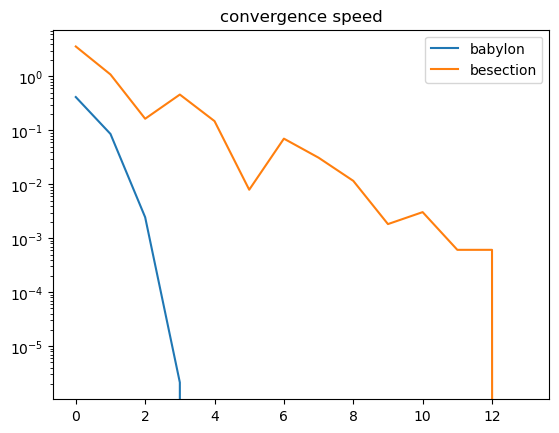

PyObject <matplotlib.legend.Legend object at 0x7fb6542b3450>

In [26]:
semilogy(xn)
semilogy(xn′)
title("convergence speed")
legend(["babylon", "besection"])

### Problem 4

In [4]:
using Interact
using Plots

In [5]:
@manipulate for i in 1:10 
    plot([i])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict(

### Problem 5

In [1]:
struct FieldExtension
    a::Int
    b::Int
end

In [6]:
Base.show(io::IO, x::FieldExtension) = print(io, x.a, "+", x.b, "√2")

In [7]:
s = FieldExtension(1, 3)

1+3√2